In [21]:
import torch
from feeders.feeder_ntu import Feeder

test_feeder_args = {
  'data_path': 'data/ntu/NTU60_CS.npz',
  'split': 'test',
  'window_size': 64,
  'p_interval': [0.95],
  'vel': False,
  'bone': False,
  'debug': False,
}

data_loader = torch.utils.data.DataLoader(
                dataset=Feeder(**test_feeder_args),
                batch_size=32,
                shuffle=False,
                num_workers=0,
                drop_last=False,
                worker_init_fn=1)

In [22]:
from tqdm import tqdm

process = tqdm(data_loader, ncols=40)

for batch_idx, (data, label, index) in enumerate(process):
    print('shape: ', data.shape, '\nindex: ', index)
    break

  0%|           | 0/516 [00:00<?, ?it/s]

shape:  torch.Size([32, 3, 64, 25, 2]) 
index:  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])


In [24]:
data = data.view(64, 64, 25, 3)

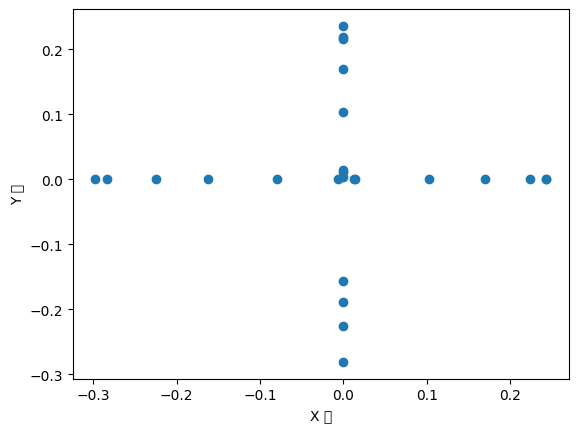

(tensor([-0.0066,  0.0000,  0.0126,  0.0000, -0.2831,  0.0000,  0.2235,  0.0000,
         -0.0795,  0.0000, -0.1628,  0.0000,  0.1025,  0.0000, -0.2973,  0.0000,
          0.2430,  0.0000,  0.0143,  0.0000, -0.2251,  0.0000,  0.1705,  0.0000,
          0.2436]),
 tensor([ 0.0000,  0.0139,  0.0000, -0.2252,  0.0000,  0.1702,  0.0000,  0.2149,
          0.0000, -0.1882,  0.0000,  0.1027,  0.0000,  0.0109,  0.0000,  0.2186,
          0.0000,  0.0034,  0.0000, -0.1559,  0.0000, -0.2809,  0.0000,  0.2357,
          0.0000]))

In [30]:
import matplotlib.pyplot as plt

# 假设 data 是你的四维数据
data = data.view(64, 64, 25, 3)

# 选择第一个 batch 的第一个帧
frame_data = data[18, 0, :, :]

# 获取xy坐标
x = frame_data[:, 0]
y = frame_data[:, 1]


# 连接的骨骼点索引
inward_ori_index = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5), (7, 6),
                    (8, 7), (9, 21), (10, 9), (11, 10), (12, 11), (13, 1),
                    (14, 13), (15, 14), (16, 15), (17, 1), (18, 17), (19, 18),
                    (20, 19), (22, 23), (23, 8), (24, 25), (25, 12)]

# 创建一个图形
fig, ax = plt.subplots()

# 使用scatter函数绘制散点图
ax.scatter(x, y, marker='o')

# # 使用plot函数绘制连接的线
# for start, end in inward_ori_index:
#     ax.plot([x[start-1], x[end-1]], [y[start-1], y[end-1]], color='blue')

# 设置图形参数
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')

# 显示图形
plt.show()

x, y